# NetworkX exercise 

In [67]:
%matplotlib inline
import networkx as nx
import vis_bel
import os
import pickle
import imp
import numpy as np
import itertools as itt

In [68]:
base = os.environ['BUG_FREE_EUREKA_BASE']
path_networkx_AD_pickled =os.path.join(base,'data','exercise05','networkx.graph.AD.pickled')

## Loading Alzheimer's disease network into networkX graph with pickle

In [69]:
graph_AD = pickle.load(open(path_networkx_AD_pickled,'rb'))


Here some words about [pickle](https://docs.python.org/3/library/pickle.html)

### Explore

In [70]:
len(graph_AD),len(graph_AD.nodes()), graph_AD.number_of_nodes()  # number of nodes

(11927, 11927, 11927)

In [71]:
graph_AD.number_of_edges() # number of nodes

59408

In [72]:
graph_AD[1] # node 1 connections with edge information

{2: {0: {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'},
  1: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'}},
 1828: {0: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   '

In [73]:
graph_AD[1].keys() # nodes ids connected to node 1 

dict_keys([2, 1828])

In [74]:
graph_AD[1][2].keys()

dict_keys([0, 1])

In [75]:
graph_AD[1][2][0].get('rel')

'decreases'

In [76]:
graph_AD.nodes()[:2] # all nodes

[1, 2]

In [77]:
graph_AD.nodes(data=True)[:2]

[(1,
  {'BEL': 'a(CHEBI:"gamma-secretase inhibitor")',
   'function': 'a',
   'namespace': 'CHEBI',
   'value': 'gamma-secretase inhibitor'}),
 (2,
  {'BEL': 'complex(SCOMP:"gamma Secretase Complex")',
   'function': 'complex',
   'namespace': 'SCOMP',
   'value': '"gamma Secretase Complex"'})]

In [78]:
graph_AD.edges()[:2]

[(1, 2), (1, 2)]

In [79]:
graph_AD.edges(data=True,keys=True)[:2]

[(1,
  2,
  0,
  {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'}),
 (1,
  2,
  1,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'})]

In [80]:
#nodes = np.random.choice(graph,size=100,replace=False)


In [81]:
nodes = set(itt.chain.from_iterable((formN,toN) for formN,toN  in graph_AD.edges()[:100]))

In [82]:
graph_100 = graph_AD.subgraph(nodes)

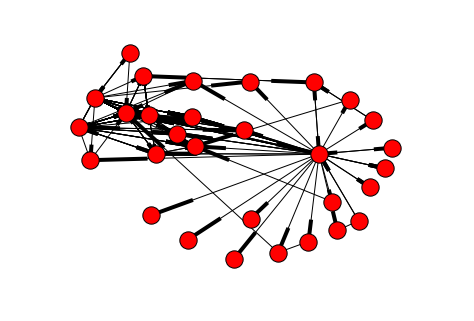

In [83]:
nx.draw(graph_100)

In [84]:
imp.reload(vis_bel)
vis_bel.draw(graph_100)
print(len(graph_100))


30


In [21]:
for edge in graph_100.edges_iter(data=True,keys=True):
    print(edge)
    break

(1, 2, 0, {'object_activity': 'act', 'rel': 'decreases', 'citation': ('Other', 'Connectors', '123'), 'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'), 'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.'})


## Tasks

0. Find the node with the highest degree in graph_100
0. get all distinct attribute keys in nodes and edges for graph_100
0. Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional
0. Find shortest paths between all nodes link to the edges found in the previsious task and create a new graph, dosplay it 

**hint** : Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional

In [220]:
##################### Question 1 #############################
lst=graph_100.nodes()
type(graph_100.degree(lst))
dict_degree=graph_100.degree(lst)

highest_degree=max(dict_degree.values())

for x in dict_degree:
    if(dict_degree[x]==highest_degree):
        print(x)

print(len(graph_100.edges()))
print(len(set(graph_100.edges())))
print(graph_100.edges())
print(graph_100.nodes())

6
394
87
[(1, 2), (1, 2), (1, 1828), (2, 1537), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 6), (2, 6), (2, 6), (2, 6), (2, 6), (2, 263), (2, 266), (2, 266), (2, 12), (2, 12), (2, 12), (2, 291), (2, 279), (2, 292), (2, 731), (2, 92), (2, 92), (2, 289), (2, 290), (2, 611), (2, 2212), (2, 293), (2, 294), (2, 294), (2, 7), (2, 7), (2, 942), (2, 1534), (2, 1828), (2, 2936), (2, 2936), (2, 2936), (2, 2937), (2, 11457), (3, 611), (3, 1217), (3, 731), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 5), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6),

In [186]:

###################### Question 2(a) #############################

attribute_edges = set()
cont=0
for n,nbrs in graph_100.adjacency_iter():
    #print(n,nbrs.keys())
    for nbr,eattr in nbrs.items():
        print(n,nbr)
        cont=cont+1
        for y in eattr.values():
            for x in y.keys():
                attribute_edges.add(x)

print(attribute_edges)
print(cont)

1 2
1 1828
2 1537
2 4
2 6
2 263
2 266
2 12
2 291
2 279
2 292
2 731
2 92
2 289
2 290
2 611
2 2212
2 293
2 294
2 7
2 942
2 1534
2 1828
2 2936
2 2937
2 11457
3 611
3 1217
3 731
3 4
3 5
3 6
3 7
3 2936
3 2937
3 155
3 942
4 6
4 7
5 611
5 3
5 4
5 5
5 6
5 7
5 2936
5 2937
5 266
5 731
5 92
6 3
6 5
6 6
6 7
6 266
6 155
263 279
266 2937
266 5
266 6
266 7
279 2
279 155
155 279
155 6
155 7
92 5
92 7
731 6
289 2937
611 6
2212 2
7 2
7 3
7 5
7 6
7 266
7 155
7 92
1217 3
1217 6
2936 2937
2937 2937
2937 7
11457 2937
1534 1537
1534 6
{'CellStructure', 'subject_translocation_to_value', 'FluidAndSecretion', 'Species', 'FDASTATUS', 'subject_translocation', 'rel', 'subject_translocation_from_namespace', 'NervousSystem', 'object_translocation', 'subject_activity', 'CellLine', 'UserdefinedSpecies', 'Developmental_Phase__of_patient', 'object_translocation_from_value', 'citation', 'object_translocation_to_namespace', 'Cell', 'subject_translocation_from_value', 'object_translocation_from_namespace', 'DigestiveSystem

In [105]:

###################### Question 2 (b) #############################

attribute_nodes = set()

for n,d in graph_100.nodes_iter(data=True):
    for x in d:
        attribute_nodes.add(x)
    
print(attribute_nodes)

{'list', 'valid_NSV', 'namespace', 'BEL', 'function', 'value'}


In [210]:
###################### Question 3 #################################

def searchEdges (keyWord,Value):
    edges_list=set()
    key_to_search=keyWord
    key_value_to_search=Value
    for n,nbrs in graph_100.adjacency_iter():     
        #print(nbrs)
        for nbr,eattr in nbrs.items():  
            #print(n,nbr,len(eattr))
         
            for y in eattr.values():   
                #print(y)
                if key_to_search in y.keys():
                    #print(type(y[key_to_search]))
                    if (isinstance(y[key_to_search],tuple)) :
                        for value_key in y[key_to_search]:
                        #print (value_key)
                            if (key_value_to_search==value_key or key_value_to_search=='' ):
                                   edges_list.add((n,nbr))
                    else:
                         if (key_value_to_search==y[key_to_search] or key_value_to_search=='' ):
                                edges_list.add((n,nbr))
    return edges_list;

edges=searchEdges('Species','')
print(edges)



{(7, 3), (3, 5), (6, 7), (5, 6), (155, 6), (3, 6), (6, 155), (3, 7), (6, 5), (5, 3)}


{(7, 3), (3, 5), (6, 7), (5, 6), (155, 6), (3, 6), (6, 155), (3, 7), (6, 5), (5, 3)}
Shortest Paths {3: {3: [3], 155: [3, 155], 5: [3, 5], 6: [3, 6], 7: [3, 7]}, 155: {3: [155, 6, 3], 155: [155], 5: [155, 6, 5], 6: [155, 6], 7: [155, 7]}, 5: {3: [5, 3], 155: [5, 3, 155], 5: [5], 6: [5, 6], 7: [5, 7]}, 6: {3: [6, 3], 155: [6, 155], 5: [6, 5], 6: [6], 7: [6, 7]}, 7: {3: [7, 3], 155: [7, 155], 5: [7, 5], 6: [7, 6], 7: [7]}}


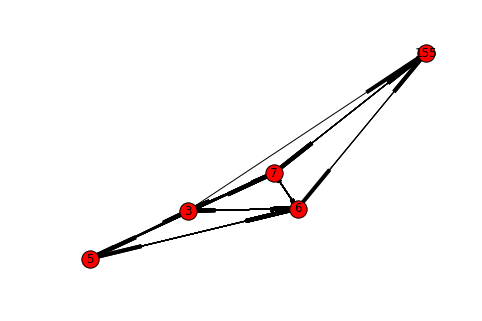

In [221]:
##################### Question  4 ###################################

node_list=set()
G=nx.Graph()
print(edges)
G.add_edges_from(edges)
for n,nbrs in G.adjacency_iter():
    #print(n,nbrs)
    #print(nbrs.keys())
    for node in nbrs.keys():
        #print('node',node)
        node_list.add(node)
        #print(node_list)    
graph_new = graph_AD.subgraph(node_list)
p=nx.shortest_path(graph_new)
nx.draw(graph_new,with_labels=True)
print('Shortest Paths' ,p)
#plt.show()